In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#impporting basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
train_df=pd.read_csv('IX_Train.csv')
train_df.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [ ]:
variables=pd.read_csv('IX_VariableDefinitions.csv')
variables

,ID,Person unique/random identification
0,country_code,The country codes
1,region,"Region_codes of a given country,.i.e., South A..."
2,age,Individual age
3,FQ1,Has ATM/debit card
4,FQ2,Is the ATM connected to an account with your n...
5,FQ3,Purchased with the ATM
6,FQ4,Has a credit card
7,FQ5,Used the credit card in 12 months
8,FQ6,Money deposits to a bank account in the last 1...
9,FQ7,Money withdrawals from a bank account in the l...


## Eploring the train dataset

In [ ]:
train_df.shape

(108446, 42)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [ ]:
#exploring unique entries
train_df.nunique()

ID              108446
country_code       144
region               9
age                 85
FQ1                  4
FQ2                  4
FQ3                  4
FQ4                  4
FQ5                  4
FQ6                  4
FQ7                  4
FQ8                  4
FQ9                  4
FQ10                 4
FQ11                 4
FQ12                 4
FQ13                 4
FQ14                 4
FQ15                 4
FQ16                 4
FQ17                 4
FQ18                 4
FQ19                 8
FQ20                 4
FQ21                 4
FQ22                 4
FQ23                 4
FQ24                 4
FQ35                 4
FQ36                 4
FQ25                 4
FQ26                 4
FQ27                 4
FQ28                 4
FQ29                 4
FQ30                 4
FQ31                 4
FQ32                 4
FQ33                 4
FQ34                 4
FQ37                 2
Target               2
dtype: int64

In [ ]:
train_df.describe()

,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
count,108446.000000,108446.000000,108124.000000,108446.000000,49124.000000,46218.000000,108446.000000,21185.000000,60659.000000,60620.000000,108446.000000,108446.000000,108446.000000,83876.000000,108446.000000,108446.000000,108446.000000,108446.000000,108446.000000,11347.000000,108446.000000,61039.000000,83767.000000,83811.000000,108446.000000,108446.000000,38432.000000,25889.000000,11483.000000,108446.000000,108446.000000,3200.000000,1506.000000,83912.000000,2115.000000,869.000000,60796.000000,108444.000000,76652.000000,108446.000000,108446.000000
mean,68.544953,2.894242,41.857395,1.563294,1.063716,1.299710,1.824622,1.160113,1.223907,1.206961,1.874444,1.799310,1.771988,1.892091,1.877718,1.910739,1.939989,1.890250,1.784759,1.645104,1.474033,2.247170,1.815178,1.783429,1.436180,1.656022,1.747398,1.573332,1.337978,1.865214,1.882282,1.578125,1.351262,1.860330,1.615130,1.436133,1.854744,1.178479,1.127511,0.631457,0.273970
std,41.529264,2.286505,17.876105,0.530077,0.288075,0.468503,0.435942,0.383827,0.450140,0.440780,0.382045,0.449365,0.465876,0.378881,0.364442,0.328127,0.279528,0.355946,0.443932,0.499412,0.578515,1.272756,0.427609,0.451251,0.523713,0.505159,0.455787,0.532004,0.481798,0.382797,0.365853,0.563689,0.493938,0.382599,0.548808,0.557423,0.401499,0.398819,0.350632,0.482412,0.445996
min,0.000000,-1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,27.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,65.000000,3.000000,39.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,105.000000,4.000000,55.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,143.000000,7.000000,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000


In [ ]:
#missing values and dupricates
train_df.isna().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


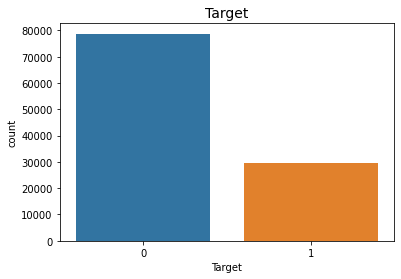

In [ ]:
sns.countplot(train_df.Target)
plt.title('Target', fontdict={'size':14});

Observation: The training data is imbalanced.

In [ ]:
#exploring the test data frame

test_df=pd.read_csv('IX_Test.csv')
test_df.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37
0,ID_000YI58E,39,2,22.0,2,NaN,NaN,2,NaN,1.0,NaN,1,2,2,2.0,2,2,2,1,2,2.0,2,2.0,2.0,NaN,1,1,NaN,2.0,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0
1,ID_001SP4JF,30,2,62.0,1,NaN,NaN,2,NaN,1.0,1.0,2,1,2,2.0,2,2,2,2,2,NaN,2,NaN,2.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,0
2,ID_001VOF6S,65,4,35.0,2,1.0,NaN,1,1.0,NaN,1.0,2,2,2,NaN,2,2,2,2,2,NaN,1,NaN,NaN,2.0,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
3,ID_0030LULG,123,0,24.0,2,1.0,NaN,2,NaN,1.0,1.0,1,2,2,2.0,2,1,2,2,2,NaN,2,1.0,2.0,2.0,2,2,NaN,2.0,NaN,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1
4,ID_0037PZ3R,67,2,25.0,2,NaN,NaN,1,NaN,NaN,2.0,2,1,2,NaN,2,2,2,1,1,NaN,3,NaN,2.0,2.0,1,2,2.0,NaN,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1


In [ ]:
test_df.tail()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37
46472,ID_ZZYOTVBJ,112,3,38.0,1,1.0,NaN,2,NaN,NaN,NaN,2,2,2,2.0,1,2,2,2,2,1.0,1,1.0,2.0,NaN,2,2,1.0,NaN,1.0,2,2,NaN,NaN,4.0,NaN,NaN,NaN,1.0,1.0,1
46473,ID_ZZYSX122,82,2,77.0,2,1.0,1.0,2,NaN,1.0,1.0,1,2,1,2.0,2,2,2,2,1,NaN,3,1.0,2.0,2.0,2,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1
46474,ID_ZZYXQDSD,93,5,26.0,2,NaN,NaN,2,NaN,1.0,NaN,1,1,2,2.0,2,1,2,2,1,NaN,2,NaN,2.0,NaN,1,4,NaN,NaN,2.0,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1
46475,ID_ZZZH9SS4,6,7,59.0,2,1.0,NaN,2,NaN,1.0,NaN,2,2,2,1.0,2,2,2,2,2,NaN,2,NaN,2.0,NaN,2,2,2.0,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1
46476,ID_ZZZTLL7U,105,0,24.0,2,NaN,NaN,2,1.0,NaN,NaN,2,2,2,2.0,2,2,2,2,1,NaN,2,2.0,2.0,2.0,1,2,2.0,NaN,1.0,2,2,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1


In [ ]:
test_df.shape

(46477, 41)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46477 entries, 0 to 46476
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            46477 non-null  object 
 1   country_code  46477 non-null  int64  
 2   region        46477 non-null  int64  
 3   age           46348 non-null  float64
 4   FQ1           46477 non-null  int64  
 5   FQ2           20801 non-null  float64
 6   FQ3           19928 non-null  float64
 7   FQ4           46477 non-null  int64  
 8   FQ5           8913 non-null   float64
 9   FQ6           25878 non-null  float64
 10  FQ7           25917 non-null  float64
 11  FQ8           46477 non-null  int64  
 12  FQ9           46477 non-null  int64  
 13  FQ10          46477 non-null  int64  
 14  FQ11          35912 non-null  float64
 15  FQ12          46477 non-null  int64  
 16  FQ13          46477 non-null  int64  
 17  FQ14          46477 non-null  int64  
 18  FQ15          46477 non-nu

In [ ]:
test_df.nunique()

ID              46477
country_code      144
region              9
age                84
FQ1                 4
FQ2                 4
FQ3                 4
FQ4                 4
FQ5                 4
FQ6                 4
FQ7                 4
FQ8                 4
FQ9                 4
FQ10                4
FQ11                4
FQ12                4
FQ13                4
FQ14                4
FQ15                4
FQ16                4
FQ17                4
FQ18                4
FQ19                8
FQ20                4
FQ21                4
FQ22                4
FQ23                4
FQ24                4
FQ35                4
FQ36                4
FQ25                4
FQ26                4
FQ27                4
FQ28                3
FQ29                4
FQ30                4
FQ31                4
FQ32                4
FQ33                4
FQ34                4
FQ37                2
dtype: int64

In [ ]:
#missing values
test_df.isna().sum()

ID                  0
country_code        0
region              0
age               129
FQ1                 0
FQ2             25676
FQ3             26549
FQ4                 0
FQ5             37564
FQ6             20599
FQ7             20560
FQ8                 0
FQ9                 0
FQ10                0
FQ11            10565
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ17            41599
FQ18                0
FQ19            20357
FQ20            10456
FQ21            10500
FQ22                0
FQ23                0
FQ24            29912
FQ35            35425
FQ36            41577
FQ25                0
FQ26                0
FQ27            45034
FQ28            45846
FQ29            10601
FQ30            45601
FQ31            46113
FQ32            20477
FQ33                0
FQ34            13341
FQ37                0
dtype: int64

### COMBINED DATASET

In [ ]:
# Combine train and test set
ntrain = train_df.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (154923, 42)


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154923 entries, 0 to 154922
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            154923 non-null  object 
 1   country_code  154923 non-null  int64  
 2   region        154923 non-null  int64  
 3   age           154472 non-null  float64
 4   FQ1           154923 non-null  int64  
 5   FQ2           69925 non-null   float64
 6   FQ3           66146 non-null   float64
 7   FQ4           154923 non-null  int64  
 8   FQ5           30098 non-null   float64
 9   FQ6           86537 non-null   float64
 10  FQ7           86537 non-null   float64
 11  FQ8           154923 non-null  int64  
 12  FQ9           154923 non-null  int64  
 13  FQ10          154923 non-null  int64  
 14  FQ11          119788 non-null  float64
 15  FQ12          154923 non-null  int64  
 16  FQ13          154923 non-null  int64  
 17  FQ14          154923 non-null  int64  
 18  FQ15

In [ ]:
# checking for null 
all_data.isna().sum()


ID                   0
country_code         0
region               0
age                451
FQ1                  0
FQ2              84998
FQ3              88777
FQ4                  0
FQ5             124825
FQ6              68386
FQ7              68386
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             35135
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17            138698
FQ18                 0
FQ19             67764
FQ20             35135
FQ21             35135
FQ22                 0
FQ23                 0
FQ24             99926
FQ35            117982
FQ36            138540
FQ25                 0
FQ26                 0
FQ27            150280
FQ28            152786
FQ29             35135
FQ30            151932
FQ31            153690
FQ32             68127
FQ33                 2
FQ34             45135
FQ37                 0
Target           46477
dtype: int64

In [ ]:
all_data.nunique()

ID              154923
country_code       144
region               9
age                 85
FQ1                  4
FQ2                  4
FQ3                  4
FQ4                  4
FQ5                  4
FQ6                  4
FQ7                  4
FQ8                  4
FQ9                  4
FQ10                 4
FQ11                 4
FQ12                 4
FQ13                 4
FQ14                 4
FQ15                 4
FQ16                 4
FQ17                 4
FQ18                 4
FQ19                 8
FQ20                 4
FQ21                 4
FQ22                 4
FQ23                 4
FQ24                 4
FQ35                 4
FQ36                 4
FQ25                 4
FQ26                 4
FQ27                 4
FQ28                 4
FQ29                 4
FQ30                 4
FQ31                 4
FQ32                 4
FQ33                 4
FQ34                 4
FQ37                 2
Target               2
dtype: int64

In [ ]:
for col in all_data.columns:
    print(col)
    print(all_data[col].unique(), "\n")

ID
['ID_000J8GTZ' 'ID_000QLXZM' 'ID_001728I2' ... 'ID_ZZYXQDSD' 'ID_ZZZH9SS4'
 'ID_ZZZTLL7U'] 

country_code
[  1  32  71  48  25  77 141  97  60  69 130  44  47  63  51 110  59 105
  49 116  58   3  99 137 126  45  46 117  75 121   8 120  11  12  74   5
  61  33 124  42  89   2  87 106 132 122 127  40  95  23 104  56 142 109
  34 111 101  17  86 107  68 112  10 125 118  65  79   0 119 136  27 135
  91  37  50  36  76  28 102 131  15  30  92  14  84  62 108  85  94  78
  55  22 139 113 129  18  70  31  19  88  93  20 100 115  29 134  98  53
   6  54 140  43  21  96  82  35 133 138  73  83  24 114  41  38  81 143
   9  57 123  72  67  16  64   4  13  39 128  80  66  52   7  26 103  90] 

region
[ 6  7  3  0  4  2  1  5 -1] 

age
[35. 70. 22. 27. 79. 69. 58. 32. 59. 60. 26. 54. 34. 47. 33. 36. 75. 76.
 52. 28. 87. 77. 53. 19. 65. 30. 78. 73. 23. 45. 41. 64. 44. 67. 18. 51.
 46. 61. 88. 25. 38. 62. 43. 37. 24. 39. 20. 15. 21. 16. 40. 66. 29. 56.
 80. 83. 63. 84. 72. 55. 17. 81. 50. 57. na

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target')

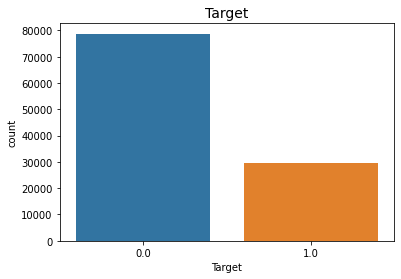

In [ ]:
sns.countplot(all_data.Target);
plt.title('Target', fontdict={'size':14})

In [ ]:
all_data['Target'].unique()


array([ 0.,  1., nan])

<h2 style="float:right" >Data Cleaning</h2>

### missing data

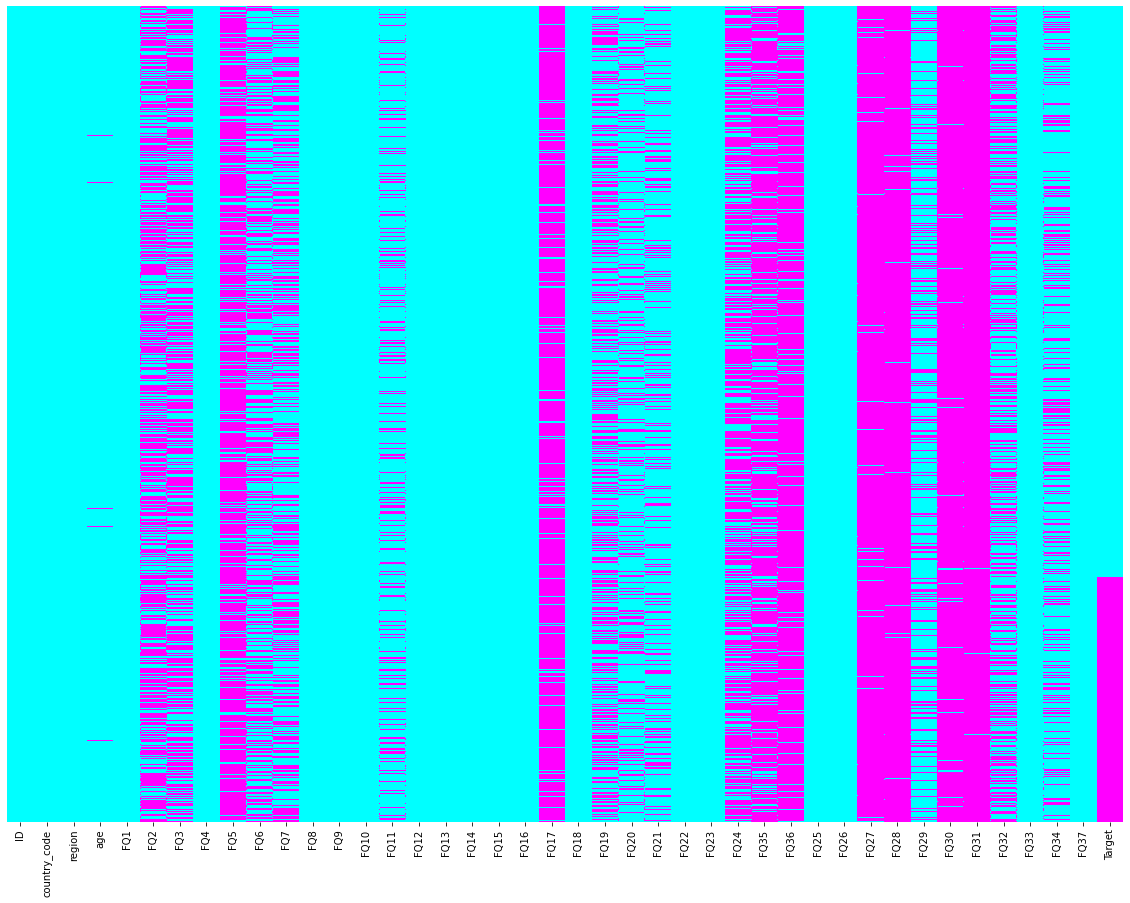

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(all_data.isna(),yticklabels=False,cbar=False,cmap="cool")


In [ ]:
data=all_data[all_data.columns.difference(['Target'])]
data.head()
print(data.shape)

(154923, 41)


In [ ]:
for column in data:
    data[column]=data[column].fillna(data[column].mode()[0])
    
    
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FQ1,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ2,FQ20,FQ21,FQ22,FQ23,FQ24,FQ25,FQ26,FQ27,FQ28,FQ29,FQ3,FQ30,FQ31,FQ32,FQ33,FQ34,FQ35,FQ36,FQ37,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,ID,age,country_code,region
0,2,1,2.0,2,2,2,2,2,2.0,2,4.0,1.0,2.0,1.0,1,2,2.0,2,2,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0,2,1.0,1.0,1.0,2,1,ID_000J8GTZ,35.0,1,6
1,2,2,2.0,2,2,2,2,2,2.0,1,3.0,1.0,2.0,1.0,1,2,2.0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0,2,1.0,1.0,1.0,2,2,ID_000QLXZM,70.0,32,7
2,2,2,4.0,2,2,1,2,1,2.0,1,1.0,1.0,2.0,2.0,1,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_001728I2,22.0,71,7
3,1,1,2.0,2,2,2,2,2,2.0,1,1.0,1.0,1.0,2.0,1,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,2.0,1.0,2,1,ID_001R7IDN,27.0,48,3
4,2,1,2.0,2,2,2,2,1,2.0,1,1.0,1.0,2.0,2.0,1,1,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_0029QKF8,79.0,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,1,2,2.0,1,2,2,2,2,1.0,1,1.0,1.0,2.0,2.0,2,2,1.0,2,2,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_ZZYOTVBJ,38.0,112,3
154919,2,1,2.0,2,2,2,2,1,2.0,3,1.0,1.0,2.0,2.0,2,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1,2,1.0,1.0,1.0,1,2,ID_ZZYSX122,77.0,82,2
154920,2,2,2.0,2,1,2,2,1,2.0,2,1.0,1.0,2.0,2.0,1,4,2.0,1,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1,2,1.0,1.0,1.0,1,1,ID_ZZYXQDSD,26.0,93,5
154921,2,2,1.0,2,2,2,2,2,2.0,2,1.0,1.0,2.0,2.0,2,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_ZZZH9SS4,59.0,6,7


In [ ]:
data['Target']=all_data['Target']

In [ ]:
data

,FQ1,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ2,FQ20,FQ21,FQ22,FQ23,FQ24,FQ25,FQ26,FQ27,FQ28,FQ29,FQ3,FQ30,FQ31,FQ32,FQ33,FQ34,FQ35,FQ36,FQ37,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,ID,age,country_code,region,Target
0,2,1,2.0,2,2,2,2,2,2.0,2,4.0,1.0,2.0,1.0,1,2,2.0,2,2,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0,2,1.0,1.0,1.0,2,1,ID_000J8GTZ,35.0,1,6,0.0
1,2,2,2.0,2,2,2,2,2,2.0,1,3.0,1.0,2.0,1.0,1,2,2.0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0,2,1.0,1.0,1.0,2,2,ID_000QLXZM,70.0,32,7,0.0
2,2,2,4.0,2,2,1,2,1,2.0,1,1.0,1.0,2.0,2.0,1,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_001728I2,22.0,71,7,0.0
3,1,1,2.0,2,2,2,2,2,2.0,1,1.0,1.0,1.0,2.0,1,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,2.0,1.0,2,1,ID_001R7IDN,27.0,48,3,0.0
4,2,1,2.0,2,2,2,2,1,2.0,1,1.0,1.0,2.0,2.0,1,1,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_0029QKF8,79.0,25,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,1,2,2.0,1,2,2,2,2,1.0,1,1.0,1.0,2.0,2.0,2,2,1.0,2,2,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_ZZYOTVBJ,38.0,112,3,NaN
154919,2,1,2.0,2,2,2,2,1,2.0,3,1.0,1.0,2.0,2.0,2,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1,2,1.0,1.0,1.0,1,2,ID_ZZYSX122,77.0,82,2,NaN
154920,2,2,2.0,2,1,2,2,1,2.0,2,1.0,1.0,2.0,2.0,1,4,2.0,1,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1,2,1.0,1.0,1.0,1,1,ID_ZZYXQDSD,26.0,93,5,NaN
154921,2,2,1.0,2,2,2,2,2,2.0,2,1.0,1.0,2.0,2.0,2,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_ZZZH9SS4,59.0,6,7,NaN


In [ ]:
data['Target']=data['Target'].fillna(data['Target'].mode()[0])
data

,FQ1,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ2,FQ20,FQ21,FQ22,FQ23,FQ24,FQ25,FQ26,FQ27,FQ28,FQ29,FQ3,FQ30,FQ31,FQ32,FQ33,FQ34,FQ35,FQ36,FQ37,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,ID,age,country_code,region,Target
0,2,1,2.0,2,2,2,2,2,2.0,2,4.0,1.0,2.0,1.0,1,2,2.0,2,2,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0,2,1.0,1.0,1.0,2,1,ID_000J8GTZ,35.0,1,6,0.0
1,2,2,2.0,2,2,2,2,2,2.0,1,3.0,1.0,2.0,1.0,1,2,2.0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0,2,1.0,1.0,1.0,2,2,ID_000QLXZM,70.0,32,7,0.0
2,2,2,4.0,2,2,1,2,1,2.0,1,1.0,1.0,2.0,2.0,1,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_001728I2,22.0,71,7,0.0
3,1,1,2.0,2,2,2,2,2,2.0,1,1.0,1.0,1.0,2.0,1,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,2.0,1.0,2,1,ID_001R7IDN,27.0,48,3,0.0
4,2,1,2.0,2,2,2,2,1,2.0,1,1.0,1.0,2.0,2.0,1,1,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_0029QKF8,79.0,25,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,1,2,2.0,1,2,2,2,2,1.0,1,1.0,1.0,2.0,2.0,2,2,1.0,2,2,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_ZZYOTVBJ,38.0,112,3,0.0
154919,2,1,2.0,2,2,2,2,1,2.0,3,1.0,1.0,2.0,2.0,2,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1,2,1.0,1.0,1.0,1,2,ID_ZZYSX122,77.0,82,2,0.0
154920,2,2,2.0,2,1,2,2,1,2.0,2,1.0,1.0,2.0,2.0,1,4,2.0,1,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1,2,1.0,1.0,1.0,1,1,ID_ZZYXQDSD,26.0,93,5,0.0
154921,2,2,1.0,2,2,2,2,2,2.0,2,1.0,1.0,2.0,2.0,2,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,ID_ZZZH9SS4,59.0,6,7,0.0


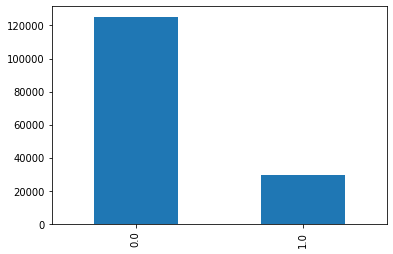

In [ ]:
data['Target'].value_counts().plot(kind='bar')

<h5>Observation:</h5> The class is imbalanced.

<h3 style="float: right" >Modelling</h3>

#### Data splitting

In [ ]:
class_1= len(train_df[train_df.Target==1])
print('Total number of class 1: ',class_1)
class_0= len(train_df[train_df.Target==0])
print('Total number of class 0: ',class_0)
#checking for the class differance
class_dif=(class1-class_0 if class_1>class_0 else class_0-class_1)
print("Class differance is: ",class_dif)

Total number of class 1:  29711
Total number of class 0:  78735
Class differance is:  49024


In [ ]:
#splitting data

# data.reset_index(drop=True, inplace=True)
y= data.Target
X= data.drop(["Target","ID"],axis=1,inplace=False)
ntrain=train_df.shape[0]

# Separate train and test data from the combined dataframe
train_df =data[:ntrain]
test_df = data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape


((108446, 42), (46477, 42))

In [ ]:
ntrain

108446

In [ ]:
test=1-(ntrain/len(data))
test

0.30000064548194905

In [ ]:
test=1-(ntrain/len(data))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,shuffle=False)
# y_test.dropna(inplace=True)

In [ ]:
X.shape

(154923, 40)

In [ ]:
#X_test.reset_index(inplace=True)
X_test.columns

Index(['FQ1', 'FQ10', 'FQ11', 'FQ12', 'FQ13', 'FQ14', 'FQ15', 'FQ16', 'FQ17',
       'FQ18', 'FQ19', 'FQ2', 'FQ20', 'FQ21', 'FQ22', 'FQ23', 'FQ24', 'FQ25',
       'FQ26', 'FQ27', 'FQ28', 'FQ29', 'FQ3', 'FQ30', 'FQ31', 'FQ32', 'FQ33',
       'FQ34', 'FQ35', 'FQ36', 'FQ37', 'FQ4', 'FQ5', 'FQ6', 'FQ7', 'FQ8',
       'FQ9', 'age', 'country_code', 'region'],
      dtype='object')

In [ ]:
X_test.shape

(46477, 40)

In [ ]:
X.columns

Index(['FQ1', 'FQ10', 'FQ11', 'FQ12', 'FQ13', 'FQ14', 'FQ15', 'FQ16', 'FQ17',
       'FQ18', 'FQ19', 'FQ2', 'FQ20', 'FQ21', 'FQ22', 'FQ23', 'FQ24', 'FQ25',
       'FQ26', 'FQ27', 'FQ28', 'FQ29', 'FQ3', 'FQ30', 'FQ31', 'FQ32', 'FQ33',
       'FQ34', 'FQ35', 'FQ36', 'FQ37', 'FQ4', 'FQ5', 'FQ6', 'FQ7', 'FQ8',
       'FQ9', 'age', 'country_code', 'region'],
      dtype='object')

In [ ]:
X_train.columns

Index(['FQ1', 'FQ10', 'FQ11', 'FQ12', 'FQ13', 'FQ14', 'FQ15', 'FQ16', 'FQ17',
       'FQ18', 'FQ19', 'FQ2', 'FQ20', 'FQ21', 'FQ22', 'FQ23', 'FQ24', 'FQ25',
       'FQ26', 'FQ27', 'FQ28', 'FQ29', 'FQ3', 'FQ30', 'FQ31', 'FQ32', 'FQ33',
       'FQ34', 'FQ35', 'FQ36', 'FQ37', 'FQ4', 'FQ5', 'FQ6', 'FQ7', 'FQ8',
       'FQ9', 'age', 'country_code', 'region'],
      dtype='object')

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# # creating an instance of the model
# model=GaussianNB()

# #training
# model.fit(X_train,y_train)

# #predicting
# y_pred=model.predict(X_test)

# #checking accuracy
# from sklearn.metrics import f1_score
# f1_score(y_test, y_pred, zero_division=1)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

#predicting
y_pred=lr.predict(X_test)

#checking accuracy
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, zero_division=1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

In [ ]:

y.shape

(154923,)

In [ ]:
X_test

,FQ1,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ2,FQ20,FQ21,FQ22,FQ23,FQ24,FQ25,FQ26,FQ27,FQ28,FQ29,FQ3,FQ30,FQ31,FQ32,FQ33,FQ34,FQ35,FQ36,FQ37,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,age,country_code,region
108446,2,2,2.0,2,2,2,1,2,2.0,2,2.0,1.0,2.0,2.0,1,1,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,0,2,1.0,1.0,1.0,1,2,22.0,39,2
108447,1,2,2.0,2,2,2,2,2,2.0,2,1.0,1.0,2.0,2.0,1,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0,2,1.0,1.0,1.0,2,1,62.0,30,2
108448,2,2,2.0,2,2,2,2,2,2.0,1,1.0,1.0,2.0,2.0,1,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,0,1,1.0,1.0,1.0,2,2,35.0,65,4
108449,2,2,2.0,2,1,2,2,2,2.0,2,1.0,1.0,2.0,2.0,2,2,2.0,1,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,1,2,24.0,123,0
108450,2,2,2.0,2,2,2,1,1,2.0,3,1.0,1.0,2.0,2.0,1,2,2.0,2,2,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0,1.0,2.0,2,1,25.0,67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,1,2,2.0,1,2,2,2,2,1.0,1,1.0,1.0,2.0,2.0,2,2,1.0,2,2,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,38.0,112,3
154919,2,1,2.0,2,2,2,2,1,2.0,3,1.0,1.0,2.0,2.0,2,2,2.0,2,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1,2,1.0,1.0,1.0,1,2,77.0,82,2
154920,2,2,2.0,2,1,2,2,1,2.0,2,1.0,1.0,2.0,2.0,1,4,2.0,1,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1,2,1.0,1.0,1.0,1,1,26.0,93,5
154921,2,2,1.0,2,2,2,2,2,2.0,2,1.0,1.0,2.0,2.0,2,2,2.0,2,2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1,2,1.0,1.0,1.0,2,2,59.0,6,7


In [ ]:
y_test.shape

(46477,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#predicting
y_pred=knn.predict(X_test)

#checking accuracy
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, zero_division=1)



0.0

In [ ]:
results={"ID":test_df['ID'],'Target':y_test}
results=pd.DataFrame.from_dict(results)
results.to_csv("LGBM_Results.csv",index=False)

In [ ]:
#under sampling

# class_1= len(train_df[train_df.Target==1])
# print('Total number of class 1: ',class_1)
# class_0= len(train_df[train_df.Target==0])
# print('Total number of class 0: ',class_0)
# #checking for the class differance
# class_dif=(class1-class_0 if class_1>class_0 else class_0-class_1)
# print("Class differance is: ",class_dif)
# #performing under sampling
# oversample = RandomOverSampler(sampling_strategy='minority')
# from imblearn.under_sampling import RandomUnderSampler
# rus=RandomUnderSampler(random_state=43, replacement= True)
# X, y = rus.fit_resample(X, y)
# #confirmation


In [ ]:
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the f1 score of the model
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred)}')

F1 score on the X_test is: 0.0


In [ ]:
results={"ID":test_df['ID'],'Target':y_test}
results=pd.DataFrame.from_dict(results)
results.to_csv("knn_Results.csv",index=False)

from google.colab import files

files.download("knn_Results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results

,ID,Target
108446,ID_000YI58E,0.0
108447,ID_001SP4JF,0.0
108448,ID_001VOF6S,0.0
108449,ID_0030LULG,0.0
108450,ID_0037PZ3R,0.0
...,...,...
154918,ID_ZZYOTVBJ,0.0
154919,ID_ZZYSX122,0.0
154920,ID_ZZYXQDSD,0.0
154921,ID_ZZZH9SS4,0.0


In [ ]:
results.nunique()

ID        46477
Target        1
dtype: int64

In [ ]:
train_df.shape

(108446, 42)

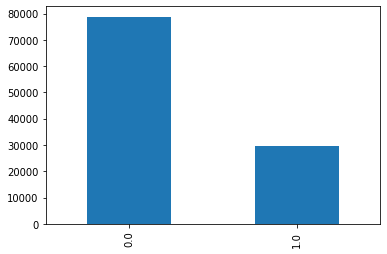

In [ ]:
train_df.Target.value_counts().plot(kind='bar')

Total number of class 1:  29711
Total number of class 0:  78735
Class differance is:  49024


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AttributeError: ignored

In [ ]:
from google.colab import files

files.download("LGBM_Results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>